<a href="https://colab.research.google.com/github/venkatesh-eranti/myntra_sales_case-study/blob/main/myntra_sales_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing required librariers

In [ ]:
import numpy as np
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# test train split
from sklearn.model_selection import train_test_split

# loading the data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/venkatesh-eranti/myntra_sales_case-study/main/Dress%2BSales.csv')
df.shape

(479, 24)

In [ ]:
df.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,3277,3321,3386,3479,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,1878,1985,2106,2454,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,10,10,10,11,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,1783,1796,1812,1845,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,1681,1743,1824,1919,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

checking the objects in the data

In [ ]:
df['09-12-2013'][(df['09-12-2013'].apply(lambda x:isinstance(x,(int,float))))]

Series([], Name: 09-12-2013, dtype: object)

In [ ]:
def obj(x):
    try:
        return int(x)
    except:
        return str(x)

In [ ]:
df['09-12-2013']=df['09-12-2013'].apply(obj)

In [ ]:
df['09-12-2013'][~(df['09-12-2013'].apply(lambda x:isinstance(x,(int,float))))]

263    Removed
Name: 09-12-2013, dtype: object

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/venkatesh-eranti/myntra_sales_case-study/main/Dress%2BSales.csv',na_values='Removed')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [ ]:
df['14-09-2013']=df['14-09-2013'].apply(obj)

In [ ]:
df['14-09-2013'][~(df['14-09-2013'].apply(lambda x:isinstance(x,(int,float))))]

263    removed
Name: 14-09-2013, dtype: object

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/venkatesh-eranti/myntra_sales_case-study/main/Dress%2BSales.csv',na_values=['Removed','removed'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [ ]:
df['22-09-2013']=df['22-09-2013'].apply(obj)
df['22-09-2013'][~(df['22-09-2013'].apply(lambda x:isinstance(x,(int,float))))]

119    Orders
Name: 22-09-2013, dtype: object

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/venkatesh-eranti/myntra_sales_case-study/main/Dress%2BSales.csv',na_values=['Removed','removed','Orders'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [ ]:
df.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [ ]:
df.fillna(0,inplace=True)

1. Summer (from March to May) <br>
2. Rainy season (June to September) <br>
3. Autumn season (from October to November) <br>
4. Winter season (from December to February) <br>

In [ ]:
df['winter']=df['09-02-2013']+df['10-02-2013']+df['09-12-2013']+df['10-12-2013']
df['summer']=df['09-04-2013']+df['10-04-2013']
df['rainy']=df['09-06-2013']+df['10-06-2013']+df['29-08-2013']+df['31-08-2013']+df['09-08-2013']+df['14-09-2013']+df['16-09-2013']+df['18-09-2013']+df['20-09-2013']+df['22-09-2013']+df['24-09-2013']+df['26-09-2013']+df['28-09-2013']+df['30-09-2013']+df['10-08-2013']
df['autumn']=df['09-10-2013']+df['10-10-2013']

In [ ]:
df.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013,winter,summer,rainy,autumn
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048,13453.0,6492.0,49119.0,6915.0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277,9880.0,4404.0,32683.0,5289.0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11,39.0,18.0,146.0,20.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963,6941.0,3396.0,25758.0,3596.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736,8065.0,3855.0,27894.0,4263.0


In [ ]:
df=df.drop(df.loc[:,'29-08-2013':'10-12-2013'].columns,axis=1)

In [ ]:
df.head()

,Dress_ID,winter,summer,rainy,autumn
0,1.006033e+09,13453.0,6492.0,49119.0,6915.0
1,1.212192e+09,9880.0,4404.0,32683.0,5289.0
2,1.190381e+09,39.0,18.0,146.0,20.0
3,9.660060e+08,6941.0,3396.0,25758.0,3596.0
4,8.763395e+08,8065.0,3855.0,27894.0,4263.0


In [ ]:
df['total']=np.sum(df.iloc[:,1:],axis=1)

In [ ]:
att=pd.read_csv('https://raw.githubusercontent.com/venkatesh-eranti/myntra_sales_case-study/main/Attribute%2BDataSet.csv')
att.shape

(479, 13)

In [ ]:
att.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [ ]:
att['Style'].unique()

array(['Sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'Flare',
       'party', 'sexy', 'Novelty', 'work', 'OL', 'fashion'], dtype=object)

In [ ]:
att['Style']=att['Style'].replace({'Sexy':'sexy'})

In [ ]:
att['Style'].unique()

array(['sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'Flare',
       'party', 'Novelty', 'work', 'OL', 'fashion'], dtype=object)

In [ ]:
att['Price'].unique()

array(['Low', 'High', 'Average', 'Medium', 'very-high', nan], dtype=object)

In [ ]:
att['Size'].unique()

array(['M', 'L', 'XL', 'free', 'S', 'small', 's'], dtype=object)

In [ ]:
att['Size']=att['Size'].replace({'s':'S','small':'S'})

In [ ]:
att['Size'].unique()

array(['M', 'L', 'XL', 'free', 'S'], dtype=object)

In [ ]:
att['Season'].unique()

array(['Summer', 'Automn', 'Spring', 'Winter', 'spring', 'winter', nan,
       'Autumn'], dtype=object)

In [ ]:
att['Season']=att['Season'].replace({'Automn':'Autumn','spring':'Spring','winter':'Winter'})

In [ ]:
att['Season'].unique()

array(['Summer', 'Autumn', 'Spring', 'Winter', nan], dtype=object)

In [ ]:
att['NeckLine'].unique()

array(['o-neck', 'v-neck', 'boat-neck', 'peterpan-collor', 'ruffled',
       'turndowncollor', 'slash-neck', 'mandarin-collor', 'open',
       'sqare-collor', 'Sweetheart', 'sweetheart', nan, 'Scoop', 'halter',
       'backless', 'bowneck'], dtype=object)

In [ ]:
att['NeckLine']=att['NeckLine'].replace({'Sweetheart':'sweetheart'})

In [ ]:
att['NeckLine'].unique()

array(['o-neck', 'v-neck', 'boat-neck', 'peterpan-collor', 'ruffled',
       'turndowncollor', 'slash-neck', 'mandarin-collor', 'open',
       'sqare-collor', 'sweetheart', nan, 'Scoop', 'halter', 'backless',
       'bowneck'], dtype=object)

In [ ]:
att['SleeveLength'].unique()

array(['sleevless', 'Petal', 'full', 'butterfly', 'short', 'threequarter',
       'halfsleeve', 'cap-sleeves', 'turndowncollor', 'threequater',
       'capsleeves', 'sleeveless', 'sleeevless', 'half', 'urndowncollor',
       'thressqatar', nan, 'sleveless'], dtype=object)

In [ ]:
att['SleeveLength']=att['SleeveLength'].replace({'sleevless':'sleeveless','sleveless':'sleeveless','short':'shortsleeve',
                                                 'half':'halfsleeve','full':'fullsleeve','urndowncollor':'turndowncollor',
                                                 'thressqatar':'threequater'})

In [ ]:
att['SleeveLength'].unique()

array(['sleeveless', 'Petal', 'fullsleeve', 'butterfly', 'shortsleeve',
       'threequarter', 'halfsleeve', 'cap-sleeves', 'turndowncollor',
       'threequater', 'capsleeves', 'sleeevless', nan], dtype=object)

In [ ]:
att['Material'].unique()

array([nan, 'microfiber', 'polyster', 'silk', 'chiffonfabric', 'cotton',
       'nylon', 'other', 'milksilk', 'linen', 'rayon', 'lycra', 'mix',
       'acrylic', 'spandex', 'lace', 'modal', 'cashmere', 'viscos',
       'sill', 'wool', 'model', 'shiffon'], dtype=object)

In [ ]:
att['Material']=att['Material'].replace({'sill':'silk','shiffon':'chiffonfabric'})

In [ ]:
att['Material']=att['Material'].replace({'modal':'model'})

In [ ]:
att['Material'].unique()

array([nan, 'microfiber', 'polyster', 'silk', 'chiffonfabric', 'cotton',
       'nylon', 'other', 'milksilk', 'linen', 'rayon', 'lycra', 'mix',
       'acrylic', 'spandex', 'lace', 'model', 'cashmere', 'viscos',
       'wool'], dtype=object)

In [ ]:
att['FabricType'].unique()

array(['chiffon', nan, 'broadcloth', 'jersey', 'other', 'batik', 'satin',
       'flannael', 'worsted', 'woolen', 'poplin', 'dobby', 'knitting',
       'flannel', 'tulle', 'sattin', 'organza', 'lace', 'Corduroy',
       'wollen', 'knitted', 'shiffon', 'terry'], dtype=object)

In [ ]:
att['FabricType']=att['FabricType'].replace({'flannael':'flannel','woolen':'wollen','knitting':'knitted','shiffon':'chiffon'})

In [ ]:
att['FabricType'].unique()

array(['chiffon', nan, 'broadcloth', 'jersey', 'other', 'batik', 'satin',
       'flannel', 'worsted', 'wollen', 'poplin', 'dobby', 'knitted',
       'tulle', 'sattin', 'organza', 'lace', 'Corduroy', 'terry'],
      dtype=object)

In [ ]:
att['Decoration'].unique()

array(['ruffles', nan, 'embroidary', 'bow', 'beading', 'lace', 'sashes',
       'hollowout', 'pockets', 'sequined', 'applique', 'button', 'Tiered',
       'rivet', 'feathers', 'flowers', 'pearls', 'pleat', 'crystal',
       'ruched', 'draped', 'tassel', 'plain', 'cascading', 'none'],
      dtype=object)

In [ ]:
att['Pattern Type'].unique()

array(['animal', 'print', 'dot', 'solid', nan, 'patchwork', 'striped',
       'geometric', 'plaid', 'leopard', 'floral', 'character', 'splice',
       'leapord', 'none'], dtype=object)

In [ ]:
df_final=pd.merge(df,att)
df_final.head()

,Dress_ID,winter,summer,rainy,autumn,total,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1.006033e+09,13453.0,6492.0,49119.0,6915.0,75979.0,sexy,Low,4.6,M,Summer,o-neck,sleeveless,NaN,chiffon,ruffles,animal,1
1,1.212192e+09,9880.0,4404.0,32683.0,5289.0,52256.0,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1.190381e+09,39.0,18.0,146.0,20.0,223.0,vintage,High,0.0,L,Autumn,o-neck,fullsleeve,polyster,NaN,NaN,print,0
3,9.660060e+08,6941.0,3396.0,25758.0,3596.0,39691.0,Brief,Average,4.6,L,Spring,o-neck,fullsleeve,silk,chiffon,embroidary,print,1
4,8.763395e+08,8065.0,3855.0,27894.0,4263.0,44077.0,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [ ]:
df_final['Dress_ID']=df_final['Dress_ID'].astype(int)

In [ ]:
df_final.shape

(479, 18)

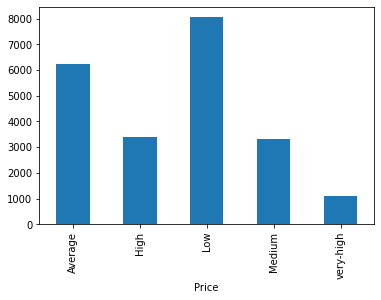

In [ ]:
df_final.groupby('Price')['total'].mean().plot.bar()

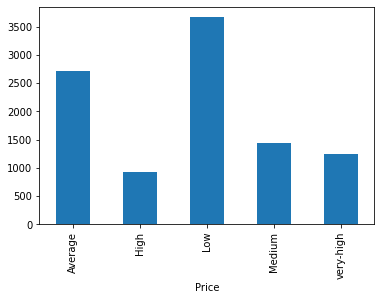

In [ ]:
df_final.groupby('Price')['total'].median().plot.bar()

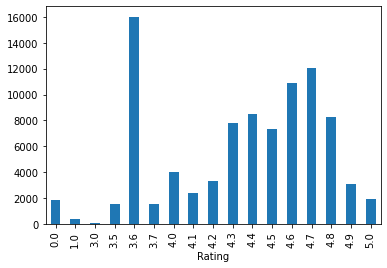

In [ ]:
df_final.groupby('Rating')['total'].mean().plot.bar()

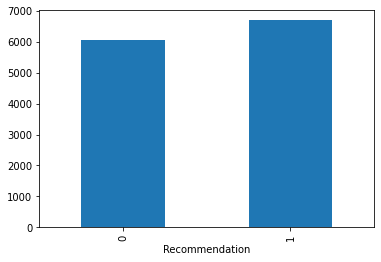

In [ ]:
df_final.groupby('Recommendation')['total'].mean().plot.bar()

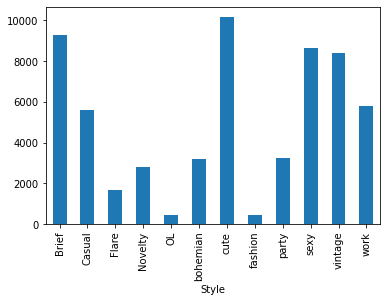

In [ ]:
df_final.groupby('Style')['total'].mean().plot.bar()

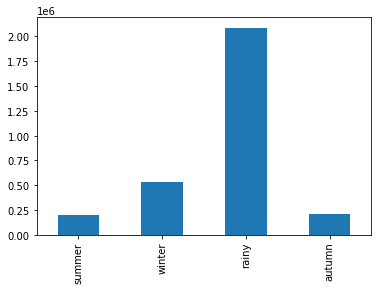

In [ ]:
df_final[['summer','winter','rainy','autumn']].sum().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


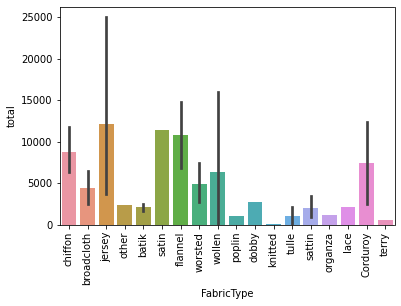

In [ ]:
sns.barplot(df_final['FabricType'],df_final['total']);
plt.xticks(rotation=90);